<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      91 non-null     int64  
 1   purpose            91 non-null     object 
 2   int.rate           91 non-null     float64
 3   installment        91 non-null     float64
 4   log.annual.inc     91 non-null     float64
 5   dti                91 non-null     float64
 6   fico               91 non-null     int64  
 7   days.with.cr.line  91 non-null     float64
 8   revol.bal          91 non-null     int64  
 9   revol.util         91 non-null     float64
 10  inq.last.6mths     91 non-null     int64  
 11  delinq.2yrs        91 non-null     int64  
 12  pub.rec            91 non-null     int64  
 13  not.fully.paid     91 non-null     int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 10.1+ KB
Accuracy: 0.7741935483870968
F1 Score: 0.7882697947214076


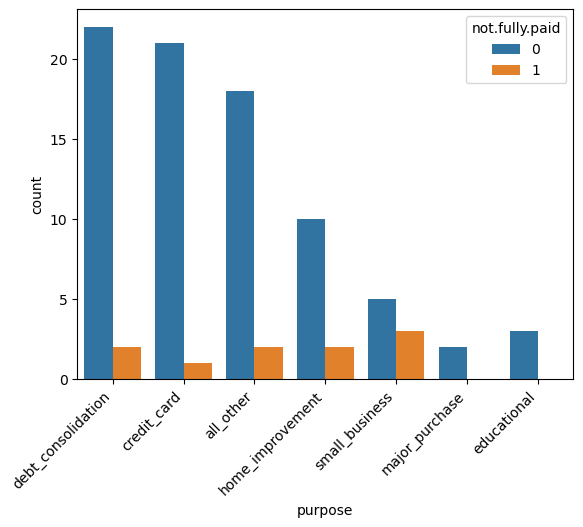

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/scet2/OneDrive/Desktop/ll.csv")
df
df.head()
df.info()
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');
pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
pre_df.head()
from sklearn.model_selection import train_test_split

x=pre_df.drop('not.fully.paid', axis=1)
y=pre_df['not.fully.paid']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=125)
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()

model.fit(x_train, y_train);
from sklearn.metrics import(accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report,)

y_pred = model.predict(x_test)

accuracy =accuracy_score(y_pred,y_test)
f1 = f1_score(y_pred,y_test, average="weighted")

print("Accuracy:",accuracy)
print("F1 Score:", f1)